# Research Notebook 1
## Suzanne Parr
## Date: February 2, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

1) I had a question which lead to a short lecture by Prof Rastgoo at our weekly meeting on the meaning of $\lambda$, the affine parameter, for a null geodesic in a Schwarzschild spacetime. I now understand that the manifold, M, is a multi-dimensional "fabric" which is the 4-D fabric of spacetime in General Relativity. The curve parameter, C, is like a function - it describes the shape or bending of the fabric - and $\lambda$ is like the independent variable for that function i.e. C($\lambda$) can be compared to f(x). It is a sort of "ticking" like how we think of time yet it can flow backwards as well as forwards. I learned that $\lambda$ can be used as the independent variable for integrating equations of motion.

2) Spent a few days working with solve_ivp to integrate the Schwarzschild metric equations of motion - from 2 different starting points - to plot $r(\phi)$ as a polar plot and a parametric plot of $r(\lambda)$ vs $\phi(\lambda)$.

3) Spent 1 day working with OGRePy to learn to represent the Schwarzschild metric functions and effective potential as a collection of symbols. Then I could use these equations to take the derivative, $\frac{dV_{\text{eff}}}{dr} = 0$, and from this solve for the extrema analytically. I learned that for a massless particle outside the Schwarzschild radius of a black hole a maxima is found to be at 3 * M (black hole mass).

## Motivation:

1) I am seeking a solid understanding of General Relativity via the Schwarzschild metric. Our next steps will be to add "quantum corrections" as an added layer of difficulty to functions that describe motion of particles, like light, around a black hole. In order to know if code is doing what we need it to do, I need to understand the end goal, the equations, and the constraints we have to work within.

2) It is important to understand what a function does and how it changes depending on initial conditions and other input. This will help when we add quantum corrections to General Relativity. I needed a clear understanding of how a high-velocity particle behaves near a massive object like a black hole so that I will be able to point out a potential superimposed quantum disturbance.

3) Numerical methods are often necessary but it is powerful to know how to be able to solve equations analytically where possible but also to learn to solve problems with symbolic functions.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

1) I was confused about the affine parameter, $\lambda$, and whether or not we can give it a range of values as the independent parameter to integrate the Schwarzschild equations of motion: $\frac{dt}{d\lambda}$, $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$. When I brought this up at our meeting Prof Rastgoo gave an inpromptu (written) lecture. I knew that he knew his subject but was pleasantly surprised at how effectively he can teach the subject matter. His lecture answered more than one burning question.

2) I was stuck on the same problem for 2 days. I was trying to use coordinate time, t, as the independent parameter to integrate the equations of motion. My resulting $r(\phi)$ polar plot was not making sense. There was a distinct orbit whereas we don't expect a stable orbit around a black hole. I had to scrap my code and start over and I finally got meaningful results - see "orbits" section below.


# 3: So what? (What does it mean?)

# Quantum Black Holes - Intro

In astronomy the only thing we can detect is light. Understanding how it behaves near massive objects is essential to our understanding of black holes as a known form of "dark matter". 

The research goal is to understand how quantum effects can cause slight alterations to the path of massless particles like light - and also particles with mass - in the vicinity of black holes. We start with the Schwarzschild metric which describes particle motion in a spacetime governed by general relativity. This metric predicts orbital precession (observed in the orbit of planet Mercury), light deflection (lensing), and time dilation for a particle moving near a massive object. 

The following code explores General Relativity via the Schwarzschild metric.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import OGRePy as gr
from scipy.integrate import solve_ivp
import sympy as sp

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: You have the latest version of the package.

# Schwarzschild functions

The following code block is for functions that derive from the Schwarzschild metric representing a static, spherically symmetric spacetime:  

$$ ds^2 = - f(r) \, dt^2 + g(r) \, dr^2 + h(r) \left( d\theta^2 + \sin^2\theta \, d\phi^2 \right) $$
                                                      
If we put this in the form of a point particle Lagrangian we get:  

$$ \mathcal{L} = - f(r) \, \dot{t}^2 + g(r) \, \dot{r}^2 + h(r) \left( \dot{\theta}^2 + \sin^2\theta \, \dot{\phi}^2 \right) $$

Due to spherical symmetry we can confine calculations to the equatorial plane where, $\theta = \frac{\pi}{2}$ and, $\sin^2(\theta) = 1$. Then if we integrate once we get expressions for $\dot{t}$, $\dot{r}^2$ and $\dot{\phi}$ in terms of the schwarzschild metric functions, the conserved quantities, E (energy) and L (angular momentum) and $\sigma$ (0 for null and 1 for time-like geodesics). If we re-arrange the radial component to isolate $E^2$ we can "read off" the Effective Potential,

$$V_{\text{eff}}(r) = - f(r) \left( \sigma - \frac{L^2}{h(r)} \right)$$

an expression that is comparable to gravitational potential energy in Newtonian mechanics. Below we define the Schwarzschild metric functions, Effective Potential, and Equations of Motion for a Schwarzschild spacetime. 

In [9]:
# functions including Schwarzschild radius and metric functions, effective potential, and equations of motion.

# constants: normalized speed of light & gravitational constant
c = 1.0 
G = 1.0 

# get schwarzschild radius from mass
def rad_sc(M):
    return (2*G*M/c**2)

# schwarzschild metric functions (dependent on radial component, r, and Schwarzschild radius)
def f(r, M):
    return 1 - (2*G*M/(c**2*r))

def g(r, M):
    return (1 - 2*G*M/(c**2*r))**(-1)

def h(r):
    return r**2

# effective potential
def v_eff(r, M, L, sigma=0):
    return -(f(r, M) * (sigma - (L**2 * h(r)**(-1))))

# tau - not accessed in this function - can be replaced by the affine parameter lambda for null geodesics (massless particles)
# equations of motion
def eq_of_motion(tau, y, params, sigma=0):

    t, r, phi = y
    E, L, M = params

    dt_dtau = E / f(r, M)
    dphi_dtau = L / h(r)
    dr_dtau = np.sqrt(g(r, M)**(-1) * (f(r, M)**(-1) * E**2 + (sigma - L**2 / h(r))))

    return [dt_dtau, dr_dtau, dphi_dtau]

# Assign Values to Constants

Here we assign values for Mass (central massive object), and Energy and Angular momentum of the orbiting particle.

In [10]:
# assign values for mass, energy, and angular momentum
M1 = 1.0  
rs1 = rad_sc(M1)
r1 = 10 * rs1

# conserved quantities (constants)
E1 = 1.1 # energy of orbiting particle
L1 = 4.0 # angular momentum of orbiting particle
L2 = 4.2
L3 = 4.4

# Effective Potential as a function of radius from the black hole

Next we explore the effective potential. We find that there is a maxima outside the Schwarzschild radius. To have orbits (around a massive object) we need either a maxima or a minima. Minima produce very stable orbits. Maxima can sustain an orbit but the object is easily knocked out of this orbit. If we plot $V_{\text{eff}}(r)$ and change the values of L we find that the extremum (maximum) is always at the same value of r.

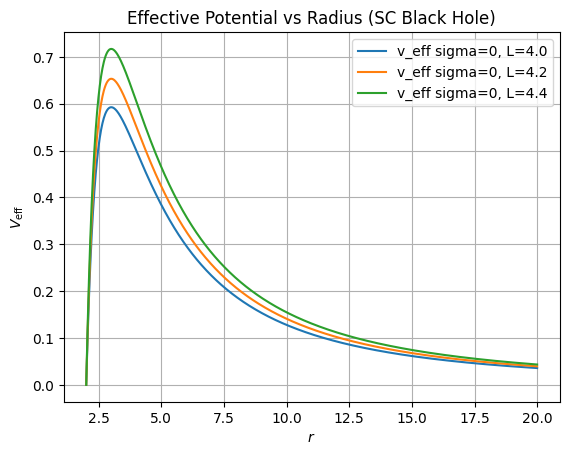

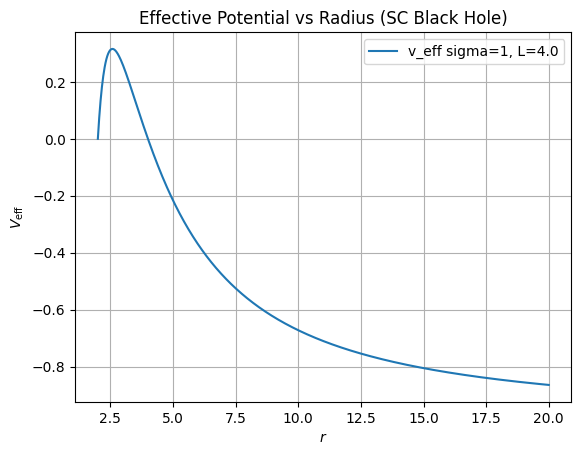

In [11]:
# calculate v_eff as a function of radius given M (black hole mass), L (particles's angular momentum)
# span of r values
r_vals = np.linspace(rs1, r1, 1000)

# get list of effective potential values for sigma=0
v_eff_vals = np.array([v_eff(i, M1, L1, sigma=0) for i in r_vals])
v_eff_vals_L2 = np.array([v_eff(i, M1, L2, sigma=0) for i in r_vals])
v_eff_vals_L3 = np.array([v_eff(i, M1, L3, sigma=0) for i in r_vals])

# get list of effective potential values for sigma=1
v_eff_vals1 = np.array([v_eff(i, M1, L1, sigma=1) for i in r_vals])

# Plot the results sigma = 0
plt.plot(r_vals, v_eff_vals, label=f'v_eff sigma=0, L={L1}')
plt.plot(r_vals, v_eff_vals_L2, label=f'v_eff sigma=0, L={L2}')
plt.plot(r_vals, v_eff_vals_L3, label=f'v_eff sigma=0, L={L3}')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('Effective Potential vs Radius (SC Black Hole)')
plt.legend()
plt.grid(True)
plt.show()
# Plot the results sigma = 1
plt.plot(r_vals, v_eff_vals1, label=f'v_eff sigma=1, L={L1}')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{\rm eff}$')
plt.title('Effective Potential vs Radius (SC Black Hole)')
plt.legend()
plt.grid(True)
plt.show()

# Extrema

In the following code block When we take the derivative of $V_{\text{eff}}(r)$ and set it equal to zero, we are solving for the critical points (or roots) of the first derivative. These critical points are where the slope of the effective potential is zero, which corresponds to potential extrema (maxima or minima). To determine whether these critical points are maxima or minima, we take the second derivative $\frac{d^2V_{\text{eff}}}{dr^2}$. If the second derivative is negative at a particular critical point, it indicates a maximum, while a positive value suggests a minimum.

In the case of a massless particle ($\sigma = 0$) there is a maximum at r = 3 * M.

In [12]:
# find extrema analytically using OGRePy
# null geodesics case

# define symbolic variables
r, M, L, sigma = gr.syms("r M L sigma")

# define schwarzschild metric functions and effective potential
# symbolic by default since they are built from symbols
def f(r, M):
    return 1 - (2 * M / r)

def h(r):
    return r**2

# define effective potential
v_eff = -f(r, M) * (sigma - L**2 / h(r))

# first derivative with respect to r
dv_eff_dr = gr.s.diff(v_eff, r).subs(sigma, 0)

# solve for roots
roots = gr.s.solve(dv_eff_dr, r)
print("Extrema:", roots)

# second derivative
d2v_eff_dr2 = gr.s.diff(dv_eff_dr, r)

# maxima?
ex_results = []
for r_ex in roots:
    sec_deriv_at_r_ex = d2v_eff_dr2.subs(r, r_ex).simplify()

    if sec_deriv_at_r_ex == -2*L**2/(81*M**4):
        ex_results.append((r_ex, "maximum"))
    else:
        ex_results.append((r_ex, "inconclusive"))

for r_val, extrema_type in ex_results:
    print(f"r = {r_val}, Type: {extrema_type}")

# explicit confirmation based on the simplified expression
if roots == [3*M]: 
    print(f"Since d²V_eff/dr² = -2*L²/(81*M⁴), and this is negative, r = {roots[0]} is a MAXIMUM")

Extrema: [3*M]
r = 3*M, Type: maximum
Since d²V_eff/dr² = -2*L²/(81*M⁴), and this is negative, r = 3*M is a MAXIMUM


# Orbits - method 1

In the first approach we find $r(\phi)$ using the following expression,

$$\frac{dr}{d\phi} = \frac{\dot{r}}{\dot{\phi}} = \frac{h(r)}{L} \sqrt{\frac{1}{g(r)} \left( \frac{E^2}{f(r)} + \left( \sigma - \frac{L^2}{h(r)} \right) \right)}$$

then integrate using 'solve_ivp' and plot in polar format. In the next code block we define a solver named 'solve_r_phi' then in the following code block we set initial conditions, run the solver, and plot the orbit.

In [13]:
# solve for r(phi) and make a polar plot
# define dr/dphi solver function for integration
def solve_r_phi(params, phi_range, r_init, sigma=0):
    
    E, L, M = params  # unpack parameters
    
    def dr_dphi(phi, y):
        r = y[0]
        epsilon = 1e-6
        
        # stop integration if r is out of bounds
        if r <= rs1 + epsilon or r >= r_max:
            return [0] 
        
        hr = h(r)
        fr = f(r, M)
        gr = g(r, M)
        dr_dphi = (hr / L) * np.sqrt(max(0, 1 / gr * (E**2 / fr + (sigma - L**2 / hr))))
        return [dr_dphi]
    
    # Solve the ODE
    sol = solve_ivp(dr_dphi, phi_range, [r_init], t_eval=np.linspace(*phi_range, 1000), atol=1e-5, rtol=1e-5)
    return sol

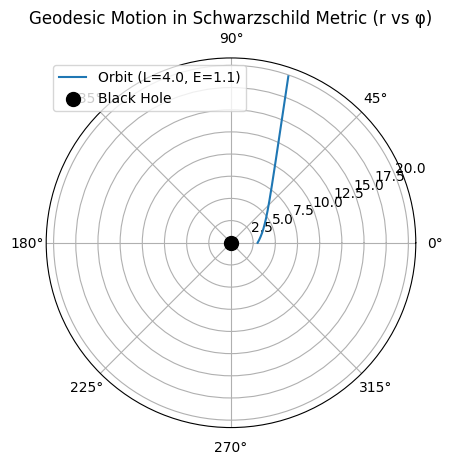

In [15]:
# code to integrate dr_dphi and display as a polar plot

# initial conditions
phi_range = (0, 2 * np.pi)
r_init = 1.5 * rs1 
params = [E1, L1, M1]
r_max = 10 * rs1
sol_r_phi = solve_r_phi(params, phi_range, r_init)

# extract solution
phi_vals = sol_r_phi.t
r_vals = sol_r_phi.y[0]
valid_indices = r_vals <= r_max
phi_vals2 = phi_vals[valid_indices]
r_vals2 = r_vals[valid_indices]

# plar plot
plt.polar(phi_vals2, r_vals2, label=f'Orbit (L={L1}, E={E1})')
plt.scatter([0], [0], color='black', marker='o', s=100, label='Black Hole', zorder=5)
plt.title('Geodesic Motion in Schwarzschild Metric (r vs φ)')
plt.legend()
plt.grid(True)
plt.show()

# Orbits - method 2

In the 2nd approach we solve for $r(\lambda)$ and $\phi(\lambda)$ by integrating the equations of motion $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$ with 'solve_ivp' then we plot $r(\lambda)$ vs $\phi(\lambda)$ in parametric format.

In the following code block we define the solver function, 'solve_r_phi_tau', then in the following block we set initial conditions, run the solver, and plot.

In [16]:
# solver to compute r(lambda), phi(lambda)

# solve for r and phi as a function of tau using eq_of_motion
def solve_r_phi_tau(params, tau_range, r_init, phi_init, sigma=0):

    E, L, M = params

    # initial conditions [t, r, phi]
    y0 = [0, r_init, phi_init] 

    def dy_dt(tau, y):
        # get ODE's from eq_of_motion function
        dt_dtau, dr_dtau, dphi_dtau = eq_of_motion(tau, y, params, sigma)

        return [dt_dtau, dr_dtau, dphi_dtau]

    # solve for r(lambda) and phi(lambda)
    sol = solve_ivp(dy_dt, tau_range, y0, t_eval=np.linspace(*tau_range, 1000), atol=1e-5, rtol=1e-5)
    return sol

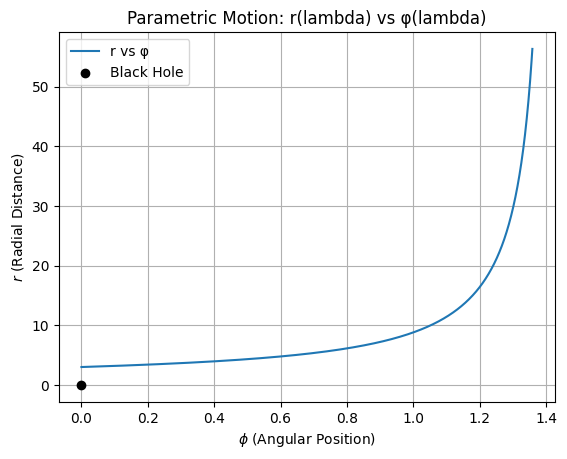

In [17]:
# initial conditions / constants
r_init = 1.5 * rs1  
params = [E1, L1, M1]

# solve for r(t) and phi(t)
tau_range = [0, 50]
phi_init = 0

sol_y = solve_r_phi_tau(params, tau_range, r_init, phi_init, sigma=0)

if not sol_y.success:
    print("Integration failed:", sol_y.message)

# get results for r(tau) and phi(tau)
r_vals2 = sol_y.y[1]  # radial distances
phi_vals2 = sol_y.y[2]  # angular positions

# parametric plot: r(tau) vs phi(tau)
plt.plot(phi_vals2, r_vals2, label=f'r vs φ')
plt.scatter([0], [0], color='black', label='Black Hole', zorder=5)
plt.xlabel(r'$\phi$ (Angular Position)')
plt.ylabel(r'$r$ (Radial Distance)')
plt.title('Parametric Motion: r(lambda) vs φ(lambda)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Now what? (What's next?)
## Plan for the next week

Read the paper, 'A generalized uncertainty-inspired quantum black hole' by Saeed Rastgoo et al, to get proposed quantum corrections to our Schwarzschild Metric, add these corrections to our code, then start to generate some results. How do zero-mass and particles with mass behave near a massive body like a black hole and to learn whether quantum effects can be detected.

If there's time I will explore object-oriented programming and develop a black hole class.

# 5. Bibliography

Gravity – An Introduction to Einstein’s General Relativity, James B. Hartle, Pearson Education Inc., 2003.

EXPLORE - Draft, Saeed Rastgoo, 2024

ChatGPT - LaTeX mark-up for equations:
https://chatgpt.com/share/67a046f6-fabc-8006-a42a-27b7772177a6